In [2]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time as time
import seaborn as sns

In [3]:
# lê o arquivo
files = [["Test_alinhado_190622104949.csv", 2.5, 'Desalinhamento: 0 mils, Freq. motor: 60Hz, Freq. Interesse: 4 KHz'], #0
         ['TestMisa15_190622105645.csv', 1, 'Desalinhamento: 15 mils, Freq. motor: 60Hz, Freq. Interesse: 4 KHz'], #1
         ['TestMisa35_10k_20Hz_190622111712.csv', 2.5, 'Desalinhamento: 35 mils, Freq. motor: 20Hz, Freq. Interesse: 10 KHz'], #2
         ['TestMisa35_10k_20Hz_unb_190622112701.csv', 2.5, 'Desalinhamento: 35 mils, Desbalanceado, Freq. motor: 20Hz, Freq. Interesse: 10 KHz'], #3
         ['TestMisa35_10k_30Hz_unb_190622112908.csv', 2.5, 'Desalinhamento: 35 mils, Desbalanceado, Freq. motor: 30Hz, Freq. Interesse: 10 KHz'], #4
         ['TestMisa35_10k_40Hz_190622111523.csv', 2.5, 'Desalinhamento: 35 mils, Freq. motor: 40Hz, Freq. Interesse: 10 KHz'], #5
         ['TestMisa35_10k_5Hz_190622111835.csv', 2.5, 'Desalinhamento: 35 mils, Freq. motor: 5Hz, Freq. Interesse: 10 KHz'], #6
         ['TestMisa35_10k_80Hz_190622112104.csv', 2.5, 'Desalinhamento: 35 mils, Freq. motor: 80Hz, Freq. Interesse: 10 KHz'], #7
         ['TestMisa35_190622110239.csv', 2.5, 'Desalinhamento: 35 mils, Freq. motor: 60Hz, Freq. Interesse: 10 KHz'], #8
         ['TestMisa35_4k_190622111321.csv', 1, 'Desalinhamento: 35 mils, Freq. motor: 60Hz, Freq. Interesse: 4 KHz'], #9
         ['TestMisa35_8k_190622111035.csv', 2, 'Desalinhamento: 35 mils, Freq. motor: 20Hz, Freq. Interesse: 8 KHz']] #10

signal = ['Current', 'Channel2', 'Channel3', 'Tachometer', 'Channel5', 'Channel6', 'Channel7', 'Channel8']
signal = ['Current', 'Channel2', 'Channel5']

In [4]:
def getFileData(f_id):
    file_id = f_id
    return pd.read_csv('../../vibration-analysis/datasets/' + files[file_id][0])

In [5]:
Bom = getFileData(0)
Misa15 = getFileData(1)
Misa35_10k_20Hz = getFileData(2)
Misa35_10k_20Hz_unb =  getFileData(3)
Misa35_10k_30Hz_unb =  getFileData(4)
Misa35_10k_40Hz =  getFileData(5)
Misa35_10k_5Hz =  getFileData(6)
Misa35_10k_80Hz =  getFileData(7)
Misa35 = getFileData(8)
Misa35_4k = getFileData(9)
Misa35_8k =  getFileData(10)

In [6]:
len_data = len(Bom)

init = 0.9975
final = 1

X_bom                  = Bom[int(init*len_data+1):int(final*len_data)][:].to_numpy()
X_Misa15               = Misa15[int(init*len_data+1):int(final*len_data)][:].to_numpy()
X_Misa35_10k_20Hz      = Misa35_10k_20Hz[int(init*len_data+1):int(final*len_data)][:].to_numpy()
X_Misa35_10k_20Hz_unb  = Misa35_10k_20Hz_unb [int(init*len_data+1):int(final*len_data)][:].to_numpy()
X_Misa35_10k_30Hz_unb  = Misa35_10k_30Hz_unb[int(init*len_data+1):int(final*len_data)][:].to_numpy()
X_Misa35_10k_40Hz      = Misa35_10k_40Hz [int(init*len_data+1):int(final*len_data)][:].to_numpy()
X_Misa35_10k_5Hz       = Misa35_10k_5Hz[int(init*len_data+1):int(final*len_data)][:].to_numpy()
X_Misa35_10k_80Hz      = Misa35_10k_80Hz[int(init*len_data+1):int(final*len_data)][:].to_numpy()
X_Misa35               = Misa35[int(init*len_data+1):int(final*len_data)][:].to_numpy()
X_Misa35_4k            = Misa35_4k[int(init*len_data+1):int(final*len_data)][:].to_numpy()
X_Misa35_8k            = Misa35_8k[int(init*len_data+1):int(final*len_data)][:].to_numpy()

y_bom                   = np.full((1, len(X_bom)), 'Bom')
y_Misa15                = np.full((1, len(X_bom)), 'Misa15 ')
y_Misa35_10k_20Hz       = np.full((1, len(X_bom)), 'Misa35_10k_20Hz')
y_Misa35_10k_20Hz_unb   = np.full((1, len(X_bom)), 'Misa35_10k_20Hz_unb')
y_Misa35_10k_30Hz_unb   = np.full((1, len(X_bom)), 'Misa35_10k_30Hz_unb')
y_Misa35_10k_40Hz       = np.full((1, len(X_bom)), 'Misa35_10k_40Hz')
y_Misa35_10k_5Hz        = np.full((1, len(X_bom)), 'Misa35_10k_5Hz')
y_Misa35_10k_80Hz       = np.full((1, len(X_bom)), 'Misa35_10k_80Hz')
y_Misa35                = np.full((1, len(X_bom)), 'Misa35')
y_Misa35_4k             = np.full((1, len(X_bom)), 'Misa35_4k')
y_Misa35_8k             = np.full((1, len(X_bom)), 'Misa35_8k ')


y = np.concatenate((y_bom.T, 
                    y_Misa15.T, 
                    y_Misa35_10k_20Hz.T, 
                    y_Misa35_10k_20Hz_unb.T,
                    y_Misa35_10k_30Hz_unb.T, 
                    y_Misa35_10k_40Hz.T,
                    y_Misa35_10k_5Hz.T,
                    y_Misa35_10k_80Hz.T,
                    y_Misa35.T,
                    y_Misa35_4k.T,
                    y_Misa35_8k.T) , axis=0)

data = np.concatenate((X_bom, 
                       X_Misa15, 
                       X_Misa35_10k_20Hz, 
                       X_Misa35_10k_20Hz_unb,
                       X_Misa35_10k_30Hz_unb, 
                       X_Misa35_10k_40Hz,
                       X_Misa35_10k_5Hz,
                       X_Misa35_10k_80Hz,
                       X_Misa35,
                       X_Misa35_4k,
                       X_Misa35_8k), axis=0)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.2, random_state=42)

feat_cols = [ 'pixel'+str(i) for i in range(0,X_train.shape[1]) ]

df = pd.DataFrame(X_train, columns=feat_cols)

# Code

In [8]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

pca_result = pca.fit_transform(df)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

explained_variance = pca.explained_variance_ratio_
display(explained_variance)

array([7.39166262e-01, 1.35172327e-01, 9.23266888e-02, 3.33347220e-02,
       1.79226262e-11, 1.25988508e-11, 5.56999200e-12, 1.52207456e-12])

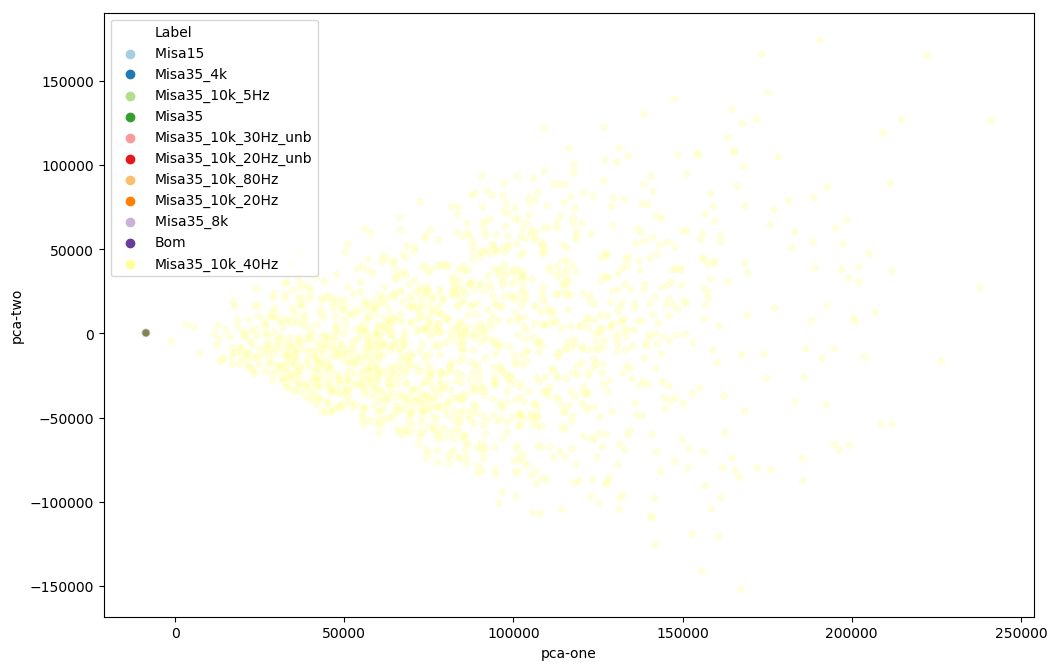

In [9]:
# only pca
df['Label'] =  y_train

plt.figure(figsize=(12,8), dpi=100)
ax = sns.scatterplot(
    x='pca-one', y='pca-two',
    hue='Label',
    palette=sns.color_palette("Paired", 11),
    data=df,
    legend="full",
    alpha=0.3,
)

ax.figure.savefig('pca.png', dpi=100)

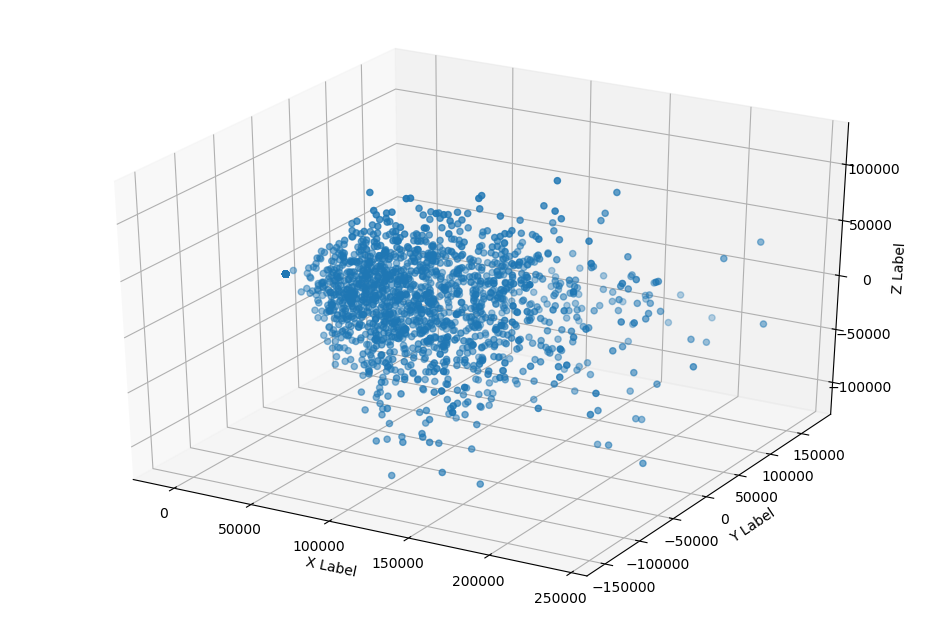

In [10]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize=(12,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['pca-one'], df['pca-two'], df['pca-three'])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# ICA

In [11]:
Data = X_Misa35_10k_80Hz.T
data = [1000*Data[6], 1000*Data[1], 1000*Data[5]]
df = np.asarray(data)
display(df)

array([[   7.895,  -26.004,  -36.763, ...,   -5.852,  172.946,  212.975],
       [ -71.764, -126.487,  -23.713, ...,  106.531,  102.51 ,   85.273],
       [ 116.639, -242.37 ,  -25.654, ...,   65.114,   -4.656, -243.32 ]])

In [12]:
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=3, random_state=0)
X_transformed = transformer.fit(df.T).transform(df.T)
X_transformed

/home/palmdev/anaconda3/envs/palmdev/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


array([[-0.00694671,  0.0136653 ,  0.01424087],
       [-0.01176407,  0.0340213 , -0.00869401],
       [ 0.00106924,  0.0077616 , -0.00039795],
       ...,
       [ 0.01115581, -0.02407289, -0.00288469],
       [-0.00831349, -0.02995843, -0.00539867],
       [-0.01614676, -0.02347747, -0.02123577]])

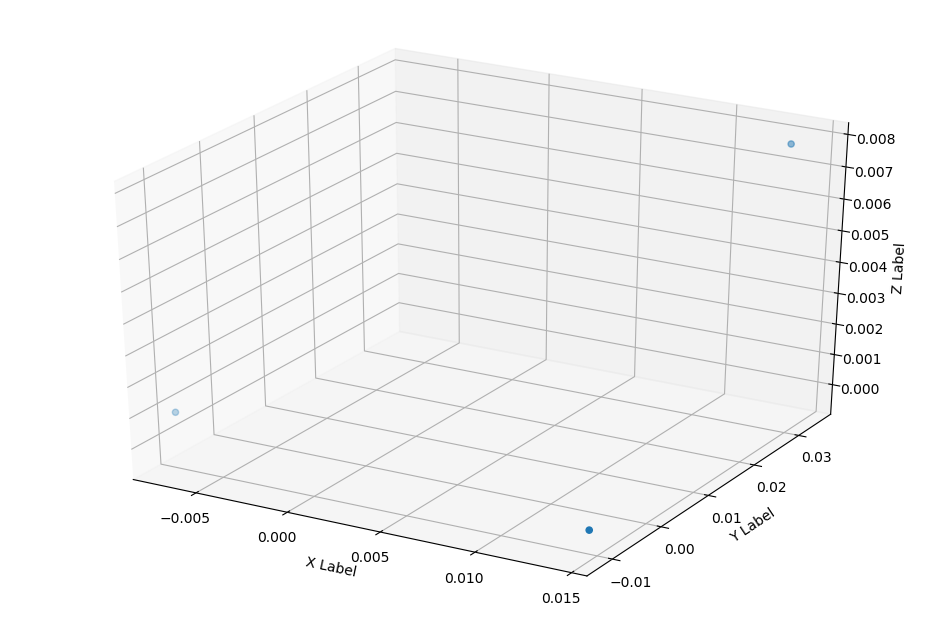

In [13]:
fig = plt.figure(figsize=(12,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_transformed[0].T, X_transformed[1].T, X_transformed[2].T)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [14]:
X_Misa35_10k_40Hz.T.shape

(8, 1966)

NameError: name 'S' is not defined

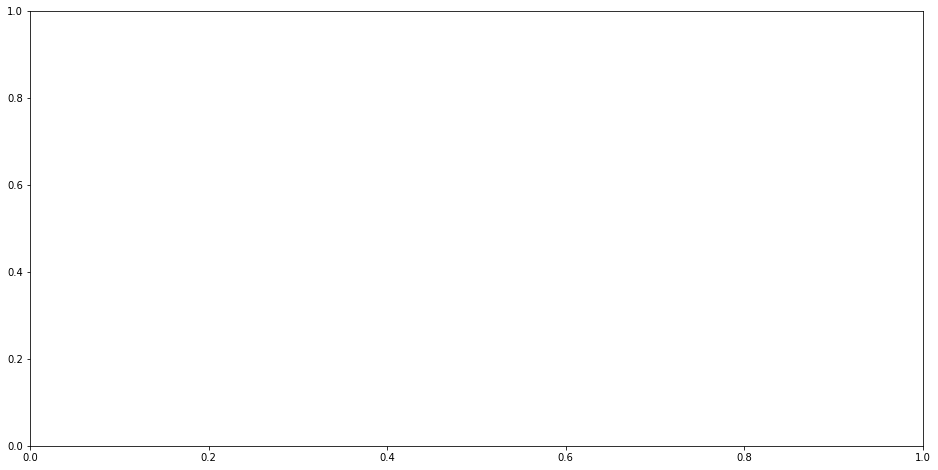

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
plt.plot(S[0])
plt.plot(S[1])
plt.plot(S_ica_[2])

Automatically created module for IPython interactive environment


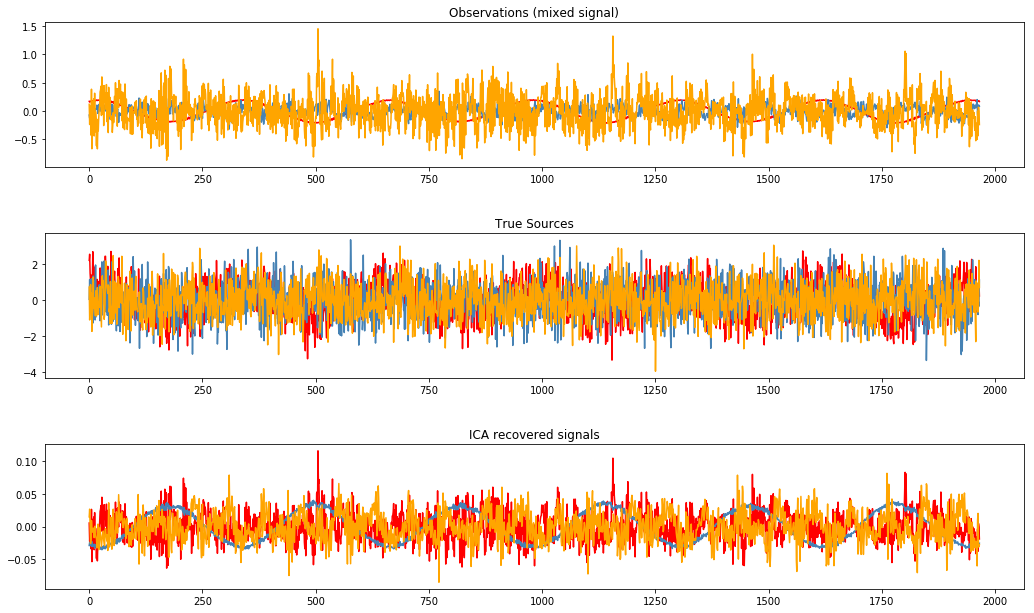

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.asarray(Data[0])  # Signal 1 : sinusoidal signal
s2 = np.asarray(Data[1])  # Signal 2 : square signal
s3 = np.asarray(Data[2])  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix

Data = X_Misa35_10k_80Hz.T
data = [(Data[0]-Data[0].mean(axis=0)), (Data[1]-Data[1].mean(axis=0)), (Data[5]-Data[5].mean(axis=0))]
df = np.asarray(data)

X = df.T  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
#assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# #############################################################################
# Plot results

plt.figure(figsize=(16,12))

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

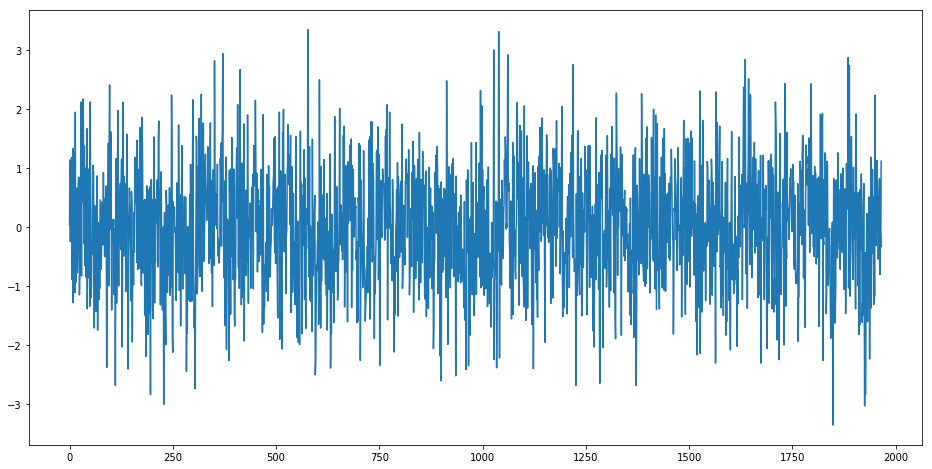

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
plt.plot(S.T[1])

In [18]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time as time
from fft_interpolation import fft_interpol

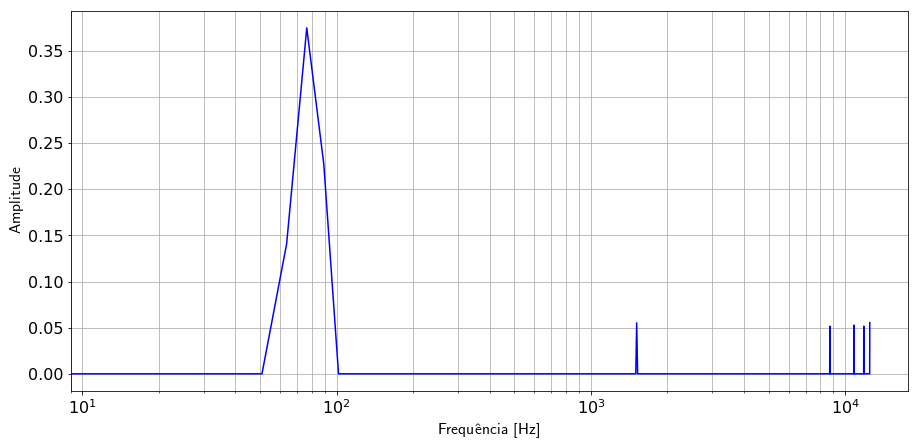

In [19]:
maximo_numeroComponentes=10000
limiar=0.05
fs=25e3

Mod_f0,Ang_f0,Freq_f0,Mod_interp,Ang_interp,Freq_interp,Modulos,Angulos,Freq=fft_interpol.calculo_espectro(fs,maximo_numeroComponentes,limiar, 'hanning',S.T[0]) 

points = len(Modulos)
parseval = np.sum(np.abs(Modulos)**2) / points

# Configurações visuais dos gráficos
title_font = {'fontname':'serif', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom', 'usetex': 'true'}
axis_font = {'fontname':'serif', 'size':'16', 'usetex': 'true'}

fig, ax = plt.subplots(nrows=1, ncols=1,  figsize=(15,7))


ax.semilogx(Freq, Modulos, color='b', ls='solid')
ax.set_xlabel('Frequência [Hz]', **axis_font)
ax.set_ylabel('Amplitude', **axis_font) 
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True,which="both",ls="-")

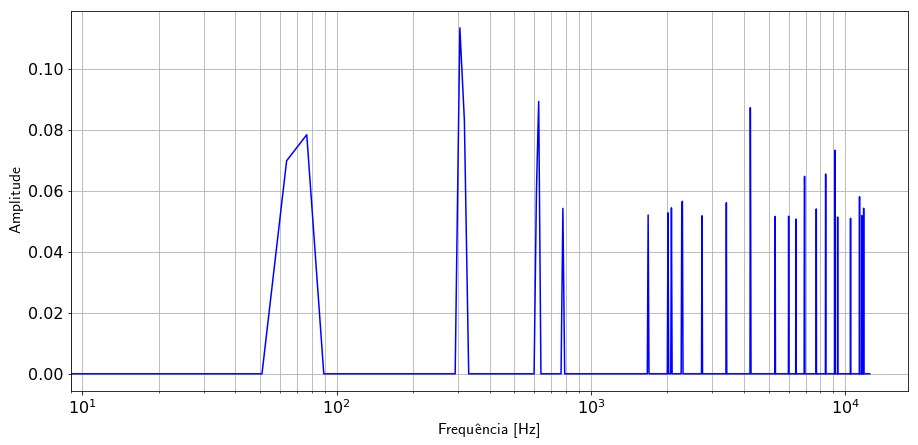

In [20]:
maximo_numeroComponentes=10000
limiar=0.05
fs=25e3

Mod_f0,Ang_f0,Freq_f0,Mod_interp,Ang_interp,Freq_interp,Modulos,Angulos,Freq=fft_interpol.calculo_espectro(fs,maximo_numeroComponentes,limiar, 'hanning',S.T[1]) 

points = len(Modulos)
parseval = np.sum(np.abs(Modulos)**2) / points

# Configurações visuais dos gráficos
title_font = {'fontname':'serif', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom', 'usetex': 'true'}
axis_font = {'fontname':'serif', 'size':'16', 'usetex': 'true'}

fig, ax = plt.subplots(nrows=1, ncols=1,  figsize=(15,7))


ax.semilogx(Freq, Modulos, color='b', ls='solid')
ax.set_xlabel('Frequência [Hz]', **axis_font)
ax.set_ylabel('Amplitude', **axis_font) 
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True,which="both",ls="-")

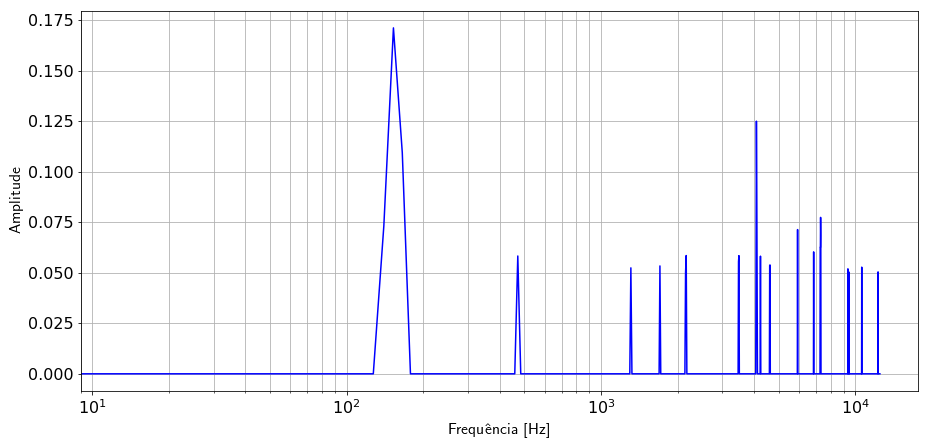

In [21]:
maximo_numeroComponentes=10000
limiar=0.05
fs=25e3

Mod_f0,Ang_f0,Freq_f0,Mod_interp,Ang_interp,Freq_interp,Modulos,Angulos,Freq=fft_interpol.calculo_espectro(fs,maximo_numeroComponentes,limiar, 'hanning',S.T[2]) 

points = len(Modulos)
parseval = np.sum(np.abs(Modulos)**2) / points

# Configurações visuais dos gráficos
title_font = {'fontname':'serif', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom', 'usetex': 'true'}
axis_font = {'fontname':'serif', 'size':'16', 'usetex': 'true'}

fig, ax = plt.subplots(nrows=1, ncols=1,  figsize=(15,7))


ax.semilogx(Freq, Modulos, color='b', ls='solid')
ax.set_xlabel('Frequência [Hz]', **axis_font)
ax.set_ylabel('Amplitude', **axis_font) 
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True,which="both",ls="-")

# SVD (Singular Value Decomposition)

Utilizado para se chegar aos autovetores e autovalores da Transformada Karhunen Loeve, quando a matriz não é quadrada;

Aplicada em redução de dimensionalidade, compressão de imagens e supressão de ruídos;

Equação:

$$X = U \Sigma V^T$$

Onde o tamanho de X é N x M (N<M)

In [22]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier

In [179]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

X, y = load_digits(return_X_y=True)

In [180]:
X.shape

(1797, 64)

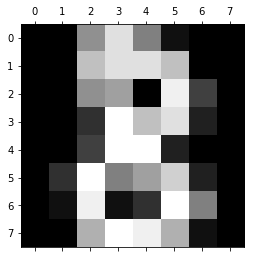

In [192]:
image = X[8]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')

In [193]:
u, s, vh = np.linalg.svd(image, full_matrices=False)

n_component = 2

smat = np.concatenate((s[:n_component], np.zeros(6)))

v = vh[:n_component, :]

for i in range(6):
    v = np.append(v, [np.zeros(8)], axis = 0)

smat = np.diag(smat)
a = np.dot(u, np.dot(smat, v))

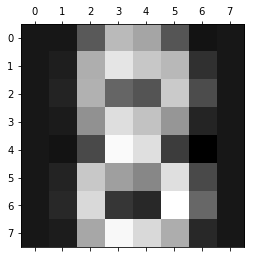

In [194]:
plt.matshow(a, cmap = 'gray')

# CEPSTRUM

"O ceptrum é uma operação matemática que consiste em extrair a Transformada de Fourier do espectro do sinal na forma logarítmica"

$$c[n] = \mathscr{F}^{-1}\{log|\mathscr{F}[n]|\}$$

In [99]:
###########################################################################
# program: cepstrum.py
# author: Tom Irvine
# Email: tom@vibrationdata.com
# version: 1.1
# date: September 12, 2013
# description:
#    This script calculates the cepstrum of a time history signal.
#
#    The time history must have two columns: time(sec) & amplitude
#
#############################################################################

from __future__ import print_function


from tompy import read_two_columns_from_dialog
from tompy import signal_stats,sample_rate_check
from tompy import GetInteger2

from math import log,atan2,pi

from numpy import floor,zeros,mean

from numpy import argmax

from scipy.fftpack import fft,ifft

import matplotlib.pyplot as plt

#############################################################################

class FFT:

    def __init__(self,a,b,imr,dt):
        self.a=a
        self.b=b
        self.imr=imr
        self.dt=dt

        
    def fft_data(self):
        
#   Truncate to 2**n

        num=len(self.b)

        noct=int(log(num)/log(2))

        num_fft=2**noct

        bb=self.b[0:num_fft]
        
        if(self.imr==1):
            bb=bb-mean(bb)

        dur_fft=num_fft*self.dt

        df=1/dur_fft
      
        
        z =fft(bb)

        nhalf=num_fft/2

        print (" ")
        print (" %d samples used for FFT " %num_fft)
        print ("df = %8.4g Hz" %df)

        zz=zeros(nhalf,'f')
        ff=zeros(nhalf,'f')
        ph=zeros(nhalf,'f')

        freq=zeros(num_fft,'f')

        z/=float(num_fft)

        for k in range(0,int(num_fft)):
            freq[k]=k*df
    
        ff=freq[0:nhalf]
        

    
        for k in range(0,int(nhalf)):    

            if(k > 0):			 
                zz[k]=2.*abs(z[k])
            else:    
                zz[k]= abs(z[k])

            ph[k]=atan2(z.real[k],z.imag[k])
  

        idx = argmax(abs(zz))        
 
        return idx,freq,ff,z,zz,ph,nhalf,df,num_fft    
    
#############################################################################  

class READ_DATA:

    def __init__(self):
        pass

    @classmethod     
    def check_data(cls,a,b,num,sr,dt):

        sample_rate_check(a,b,num,sr,dt)
        
        return sr,dt
        
    def read_and_stats(self): 
 
        label="Enter the acceleration time history..." 
 
        a,b,num =read_two_columns_from_dialog(label)

        sr,dt,ave,sd,rms,skew,kurtosis,dur=signal_stats(a,b,num)

        sr,dt=READ_DATA.check_data(a,b,num,sr,dt)

        return a,b,num,sr,dt,dur

#############################################################################   

print (" ") 

t,amp,n,sr,dt,dur=READ_DATA().read_and_stats()

plt.figure(1)
plt.plot(t, amp, linewidth=1.0)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.title('Time History')
plt.draw()

N=int(2**floor(log(n)/log(2.)))

print (" time history length = %d " %n)

if(N<n):  # zeropad
    N=2*N
    for i in range(n,int(N)):
        amp.append(0.)
    
NHS=N/2    
    
print (" ")
print (" Remove mean:  1=yes  2=no ")

imr = GetInteger2()

idx,freq,ff,z,zz,ph,nhalf,df,num_fft=FFT(t,amp,imr,dt).fft_data() 

print (" ")
print (" Maximum:  Freq=%8.4g Hz   Amp=%8.4g " %(ff[idx],zz[idx]))
    
    
plt.figure(2)     
plt.plot(ff,zz)
plt.grid(True)
plt.title(' FFT Magnitude ')
plt.ylabel(' Amplitude ')
plt.xlabel(' Frequency (Hz) ')
plt.grid(True, which="both")
plt.draw()  

plt.figure(3)
plt.plot(ff,ph*(180./pi))
plt.grid(True)
plt.title(' FFT Phase ')
plt.ylabel(' Phase (deg) ')
plt.xlabel(' Frequency (Hz) ')
plt.grid(True, which="both")
plt.draw()      

############################################################################# 

a=z.real + z.imag*1j

nnn=len(a)

b=zeros(nnn,'f')

for i in range(0,int(nnn)):
    b[i]=log(abs(a[i]))

plt.figure(4)     
plt.plot(ff,b[0:NHS])
plt.grid(True)
plt.title(' log(abs(fft(a)) ')
plt.ylabel(' Magnitude ')
plt.xlabel(' Frequency (Hz) ')
plt.grid(True, which="both")
plt.draw() 

############################################################################# 

c=ifft(b)

plt.figure(5) 

plt.plot(t[1:int(NHS)],(c[1:int(NHS)].real))
plt.title('Cepstrum  ifft(log(abs(fft(a))))')
plt.ylabel('Amplitude')
plt.xlabel('Quefrency(sec)')
plt.grid(True) 
plt.draw()  
plt.show()  

Python 3.x
 
This file exists
 


ValueError: too many values to unpack (expected 2)